
<a id='julia-environment'></a>
<div id="qe-notebook-header" style="text-align:right;">
        <a href="https://quantecon.org/" title="quantecon.org">
                <img style="width:250px;display:inline;" src="https://assets.quantecon.org/img/qe-menubar-logo.svg" alt="QuantEcon">
        </a>
</div>

# Interacting with Julia

## Colab Instructions

Colab does not have direct Julia support, and it must be installed each time you are working on a notebook.  

Instructions:

1. Ignore any errors about a missing kernel when loading the notebook.  Choose `Run Anyway` when it prompts that the notebook wasn't authored by google.

2. Run the cell below this with `Shift+Enter`.
    -  It will **5 to 8 minutes** the first time you run it for Julia and key packages to install

3. Refresh your browser, and then execute any code as normal.
  - Even after installation, there will be more precompiling latency for some packages. 

In [ ]:
%%shell
if ! command -v julia 3>&1 > /dev/null
then
    wget 'https://julialang-s3.julialang.org/bin/linux/x64/1.4/julia-1.4.1-linux-x86_64.tar.gz' \
        -O /tmp/julia.tar.gz
    tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
    rm /tmp/julia.tar.gz
    julia -e 'using Pkg; pkg"add IJulia InstantiateFromURL; precompile;"'
    julia -e 'using InstantiateFromURL; github_project("QuantEcon/quantecon-notebooks-julia", version = "0.7.0", instantiate = true, precompile = false); using Plots, Distributions, Parameters, NLsolve, ForwardDiff, Expectations'
    echo 'Done'
fi


## Contents

- [Interacting with Julia](#Interacting-with-Julia)  
  - [Overview](#Overview)  
  - [Using Jupyter](#Using-Jupyter)  
  - [Using the REPL](#Using-the-REPL)  
  - [(Optional) Adding Jupyter to the Path](#%28Optional%29-Adding-Jupyter-to-the-Path)  

## Overview

In this lecture we’ll start examining different features of the Julia and Jupyter environments.

## Using Jupyter


<a id='ipython-notebook'></a>

### Getting Started

Recall that the easiest way to get started with these notebooks is to follow the [cloning instructions](getting_started.html#clone-lectures) earlier.

To summarize, if on a desktop you should clone the notebooks repository <https://github.com/quantecon/quantecon-notebooks-julia>, then in a Julia REPL type

```julia
using IJulia; jupyterlab()
```


Hint: Julia will remember the last commands in the REPL, so you can use up-arrow to restart JupyterLab.

Alternatively, if you are using an online Jupyter, then you can directly open a new notebook.

Finally, if you installed Jupyter separately or have added [added Jupyter to the Path](#add-jupyter-to-path) then `cd` to the folder location in a terminal, and run

```text
jupyter lab
```


Regardless, your web browser should open to a page that looks something like this

<img src="_static/figures/starting_nb_julia.png" style="width:100%;">

  
The page you are looking at is called the “dashboard”.

If you click on “Julia 1.x.x” you should have the option to start a Julia notebook.

Here’s what your Julia notebook should look like

<img src="_static/figures/nb2_julia.png" style="width:100%;">

  
The notebook displays an *active cell*, into which you can type Julia commands.

### Notebook Basics

Notice that in the previous figure the cell is surrounded by a blue border.

This means that the cell is selected, and double-clicking will place it in edit mode.

As a result, you can type in Julia code and it will appear in the cell.

When you’re ready to execute these commands, hit `Shift-Enter`

<img src="_static/figures/nb3_julia.png" style="width:100%;">

#### Modal Editing

The next thing to understand about the Jupyter notebook is that it uses a *modal* editing system.

This means that the effect of typing at the keyboard **depends on which mode you are in**.

The two modes are

1. Edit mode  
  
  - Indicated by a green border around one cell, as in the pictures above.  
  - Whatever you type appears as is in that cell.  
  
1. Command mode  
  
  - The green border is replaced by a blue border.  
  - Key strokes are interpreted as commands — for example, typing b adds a new cell below  the current one.  
  


(To learn about other commands available in command mode, go to “Keyboard Shortcuts” in the “Help” menu)

#### Switching modes

- To switch to command mode from edit mode, hit the `Esc` key.  
- To switch to edit mode from command mode, hit `Enter` or click in a cell.  


The modal behavior of the Jupyter notebook is a little tricky at first but very efficient when you get used to it.

#### Working with Files

To run an existing Julia file using the notebook you can copy and paste the contents into a cell in the notebook.

If it’s a long file, however, you have the alternative of

1. Saving the file in your **present working directory**.  
1. Executing `include("filename")` in a cell.  


The present working directory can be found by executing the command `pwd()`.

#### Plots

Note that if you’re using a JupyterHub setup, you will need to first run

In [1]:
using InstantiateFromURL
# optionally add arguments to force installation: instantiate = true, precompile = true
github_project("QuantEcon/quantecon-notebooks-julia", version = "0.7.0")

in a new cell (i.e., `Shift + Enter`).

This might take 15-20 minutes depending on your setup, as it installs a large set of packages for our use.

Run the following cell

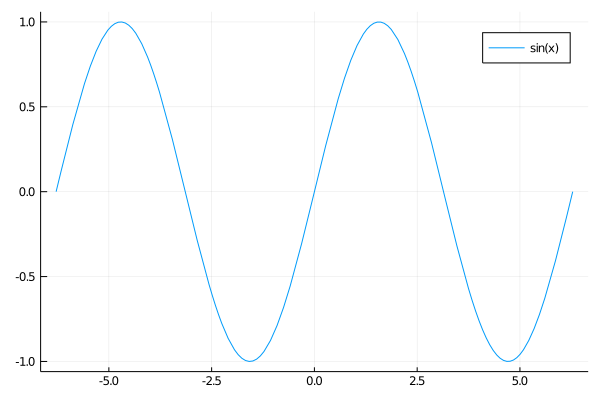

In [2]:
using Plots
gr(fmt=:png);
plot(sin, -2π, 2π, label="sin(x)")

You’ll see something like this (although the style of plot depends on your
installation)

<img src="_static/figures/nb4_julia.png" style="width:100%;">

  
**Note**: The “time-to-first-plot” in Julia takes a while, since it needs to compile many functions - but is almost instantaneous the second time you run the cell.

### Working with the Notebook

Let’s go over some more Jupyter notebook features — enough so that we can press ahead with programming.

#### Tab Completion

Tab completion in Jupyter makes it easy to find Julia commands and functions available.

For example if you type `rep` and hit the tab key you’ll get a list of all
commands that start with `rep`

<img src="_static/figures/nb5_julia.png" style="width:100%;">

  

<a id='gs-help'></a>

#### Getting Help

To get help on the Julia function such as `repeat`, enter `? repeat`.

Documentation should now appear in the browser

<img src="_static/figures/repeatexample.png" style="width:100%;">

#### Other Content

In addition to executing code, the Jupyter notebook allows you to embed text, equations, figures and even videos in the page.

For example, here we enter a mixture of plain text and LaTeX instead of code

<img src="_static/figures/nb6_julia.png" style="width:100%;">

  
Next we `Esc` to enter command mode and then type `m` to indicate that we
are writing [Markdown](http://daringfireball.net/projects/markdown/), a mark-up language similar to (but simpler than) LaTeX.

(You can also use your mouse to select `Markdown` from the `Code` drop-down box just below the list of menu items)

Now we `Shift + Enter` to produce this

<img src="_static/figures/nb7_julia.png" style="width:100%;">

#### Inserting unicode (e.g. Greek letters)

Julia supports the use of [unicode characters](https://docs.julialang.org/en/v1/manual/unicode-input/)
such as `α` and `β` in your code.

Unicode characters can be typed quickly in Jupyter using the `tab` key.

Try creating a new code cell and typing `\alpha`, then hitting the `tab` key on your keyboard.

#### Shell Commands

You can execute shell commands (system commands) in Jupyter by prepending a semicolon.

For example, `; ls` will execute the UNIX style shell command `ls`,
which — at least for UNIX style operating systems — lists the
contents of the current working directory.

These shell commands are handled by your default system shell and hence are platform specific.

#### Package Operations

You can execute package operations in the notebook by prepending a `]`.

For example, `] st` will give the status of installed packages in the current environment.

**Note**: Cells where you use `;` and `]` must not have any other instructions in them (i.e., they should be one-liners).

### Sharing Notebooks

Notebook files are just text files structured in [JSON](https://en.wikipedia.org/wiki/JSON) and typically end with `.ipynb`.

A notebook can easily be saved and shared between users — you just need to
pass around the `ipynb` file.

To open an existing `ipynb` file, import it from the dashboard (the first
browser page that opens when you start Jupyter notebook) and run the cells or edit as discussed above.

The Jupyter organization has a site for sharing notebooks called [nbviewer](http://nbviewer.jupyter.org/)
which provides a static HTML representations of notebooks.

QuantEcon also hosts the [QuantEcon Notes](http://notes.quantecon.org/) website, where you can upload and share your notebooks with other economists and the QuantEcon community.


<a id='julia-repl'></a>

## Using the REPL

As we saw in the [desktop installation](getting_started.html#intro-repl), the REPL is a Julia specific terminal.

It becomes increasingly important as you learn Julia, and you will find it to be a useful tool for interacting with Julia and installing packages.

As a reminder, to open the REPL on your desktop, either

1. Navigating to Julia through your menus or desktop icons (Windows, Mac), or  
1. Opening a terminal and typing `julia` (Linux)  


If you are using a JupyterHub installation, you can start the REPL in JupyterLab by choosing

1. Choose “New Launcher”  
1. Choose a `Julia` Console  


We examine the REPL and its different modes in more detail in the [tools and editors](../more_julia/tools_editors.html#repl-main) lecture.


<a id='add-jupyter-to-path'></a>

## (Optional) Adding Jupyter to the Path

If you [installed Jupyter using Julia](getting_started.html#jupyter-installation), then you may find it convenient to add it to your system path
in order to launch JupyterLab without running a Julia terminal.

The default location for the Jupyter binaries is relative to the `.julia` folder (e.g., `"C:\Users\USERNAME\.julia\conda\3\Scripts` on Windows).

You can find the directory in a Julia REPL using by executing

```julia
] add Conda
using Conda
Conda.SCRIPTDIR
```


On Linux/OSX, you could add that path to your `.bashrc`.

On Windows, to add directly to the path, type `;` to enter shell mode and then execute

```julia
setx PATH "$(Conda.SCRIPTDIR);%PATH%"
```
